<font size="4">A notebook for performing preliminary quality control on Pseudomonas putida's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

In [4]:
data_dir = path.join('../data/raw_data')
os.listdir(data_dir)

['multiqc_report.html',
 '.DS_Store',
 'sample_table.csv',
 'counts.csv',
 'Pseudomonas_putida_2020-08-31.tsv',
 'log_tpm.csv',
 'multiqc_stats.tsv',
 'non_precise321']

## Load expression data

In [5]:
DF_log_tpm = pd.read_csv(path.join(data_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 5564
Number of samples: 503


In [6]:
DF_log_tpm.head()

,CJ522_f_1,CJ522_f_2,CJ522_f_3,CJ522_fg_1,CJ522_fg_2,CJ522_fg_3,CJ522_gfg_1,CJ522_gfg_2,CJ522_gfg_3,CJ522_gg_1,...,SRX844823,SRX844824,SRX886503,SRX886504,SRX886505,SRX886506,SRX886507,SRX886508,SRX886509,SRX886510
Geneid,,,,,,,,,,,,,,,,,,,,,
PP_0001,7.685238,7.426457,7.430784,7.953881,7.980323,7.976536,7.932174,7.801293,7.711432,7.628685,...,7.405275,7.613902,7.126674,7.130255,7.198500,5.944330,6.648199,6.535573,6.874400,7.097306
PP_0002,6.269452,6.240088,6.084228,6.477417,6.339458,6.712686,6.727164,6.253543,6.648412,6.544883,...,8.473087,8.649454,7.141518,7.185458,7.172055,6.913728,7.367948,7.130186,7.376239,7.494323
PP_0003,6.901146,6.558103,6.595930,6.804594,6.957070,6.977378,6.932945,6.515233,6.706640,6.588193,...,8.277621,8.507717,7.212363,7.305752,7.206731,6.576817,7.067861,6.462218,7.316151,7.049680
PP_0004,6.870057,6.535493,6.797775,6.976880,7.151846,7.166448,7.441744,7.301750,7.172066,6.904431,...,8.743163,8.883814,6.826096,7.148721,7.069207,6.638025,6.905435,6.936421,6.809701,6.931599
PP_0005,4.952532,5.362360,4.944388,4.765938,4.874653,4.928894,4.945763,4.961868,5.215403,4.976892,...,5.804133,5.723847,5.715256,5.500960,6.835559,7.558303,5.688882,5.635055,5.161559,5.009741


## Load QC data

In [7]:
DF_qc_stats = pd.read_csv(path.join(data_dir,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 503


In [8]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
CJ522_f_1,10467808,2196311,2863,1047846,0,0,0,0,0,0,...,10477583,785818725,745857,765698037,2.560474,0.8085,0.0368,0.1548,0.0,0.0
CJ522_f_2,8582900,1394644,3993,786114,0,0,0,0,0,0,...,8591157,644336775,628483,627910409,2.549345,0.8480,0.0338,0.1182,0.0,0.0
CJ522_f_3,9981650,1826240,24302,956331,0,0,0,0,0,0,...,9997142,749785650,777129,723703230,3.478650,0.8297,0.0328,0.1374,0.0,0.0
CJ522_fg_1,9088099,2172337,18863,937347,0,0,0,0,0,0,...,9099751,682481325,679802,664140011,2.687446,0.7791,0.0388,0.1822,0.0,0.0
CJ522_fg_2,5792029,1356121,4503,609064,0,0,0,0,0,0,...,5796840,434763000,431153,422895254,2.729705,0.7804,0.0409,0.1787,0.0,0.0


## Load metadata

In [9]:
metadata_file = "Pseudomonas_putida_2020-08-31.tsv"
DF_metadata = pd.read_csv(path.join(data_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 541


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,biosample_genotype,R1,R2,KT2440,PrimaryQC,project_name,condition_name,rep_name,reference_condition,DOI
Experiment,,,,,,,,,,,,,,,,,,,,,
DRX086742,6/27/2017 17:01,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,True,Pass,Mobile_gene2,Condition1,1.0,Condition2,https://www.ncbi.nlm.nih.gov/bioproject/?term=...
DRX086743,6/27/2017 17:01,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,True,Fail,Mobile_gene2,Condition1,2.0,Condition2,https://www.ncbi.nlm.nih.gov/bioproject/?term=...
DRX086744,6/27/2017 17:01,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,True,Fail,Mobile_gene2,Condition1,3.0,Condition2,https://www.ncbi.nlm.nih.gov/bioproject/?term=...
DRX086745,6/27/2017 17:01,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,True,Pass,Mobile_gene2,Condition1,4.0,Condition2,https://www.ncbi.nlm.nih.gov/bioproject/?term=...
DRX086746,6/27/2017 17:01,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,True,Pass,Mobile_gene2,Condition2,1.0,Condition2,https://www.ncbi.nlm.nih.gov/bioproject/?term=...


## Remove extra sample rows

In [10]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [11]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [12]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

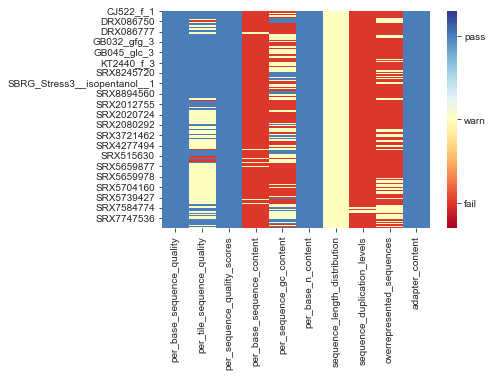

In [13]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [14]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [15]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
SRX393077,pass,pass,warn,pass
SRX393123,pass,pass,warn,pass


<font size="4">Mark samples as failed.</font>

In [16]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [17]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

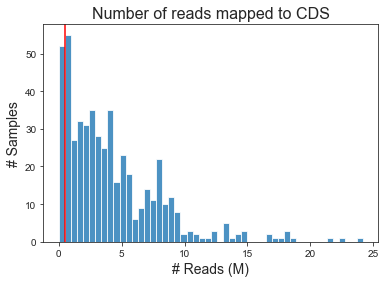

In [18]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [19]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
SRX515635,18423,714,3456,12902,0,0,0,0,29,0,...,77556,7678044,1848996,1927771,74.892421,0.0000,0.0000,0.7336,0.0427,0.2238
SRX6989402,68279421,48459,41541663,25505263,0,0,0,0,687102,0,...,68861444,9606880830,9047170,9517323219,0.932224,0.0000,0.0000,0.9784,0.0048,0.0168
SRX886507,4586718,68521,4359734,65084,0,0,0,0,0,0,...,4587665,458766500,1811038,451006925,1.691400,0.0011,0.2413,0.7577,0.0000,0.0000
SRX3823279,13275913,72456,2586169,7969967,0,0,0,0,4535,0,...,13337837,1347121537,16761118,1322420548,1.833613,0.0000,0.0000,0.4914,0.4973,0.0112
SRX3823287,13437631,84660,3693952,5881875,0,0,0,0,5899,0,...,13497878,1363285678,17035682,1338469131,1.820348,0.0000,0.0000,0.4913,0.4981,0.0106
SRX5659872,3736730,86777,2958404,308442,0,0,0,0,151143,0,...,3791800,572561800,4459777,560524476,2.102362,0.0000,0.0000,0.9165,0.0015,0.0820
SRX5659875,3808493,89929,2901620,464023,0,0,0,0,112926,0,...,3882495,586256745,7965870,568584764,3.014376,0.0000,0.0000,0.9127,0.0017,0.0856
SRX3823277,14142621,95897,2013247,9930685,0,0,0,0,3994,0,...,14212623,1435474923,18491414,1408518410,1.877881,0.0000,0.0000,0.4897,0.4936,0.0167
SRX2080292,4826222,105801,4416679,54399,0,0,0,0,0,0,...,4834890,483489000,2232976,460183056,4.820367,0.0116,0.2173,0.7711,0.0000,0.0000
SRX3823282,13890636,112151,2489819,8685259,0,0,0,0,4669,0,...,13973938,1411367738,15330809,1388500578,1.620213,0.0000,0.0000,0.4868,0.4954,0.0178


<font size="4">Mark samples as failed.</font>

In [20]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [21]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .32

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  9


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

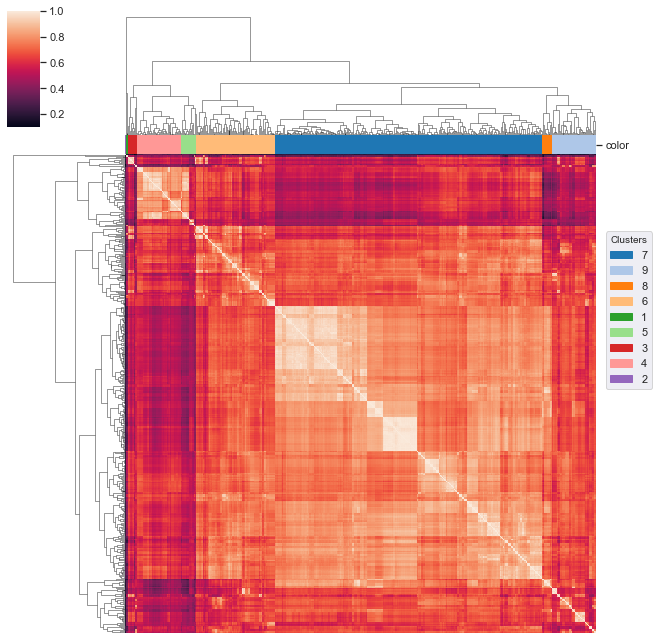

In [22]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Discard inconsistent clusters.</font>

In [23]:
#indicate which clusters you want to remove
remove_clst = [4,5]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [24]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [25]:
DF_metadata.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,KT2440,PrimaryQC,project_name,condition_name,rep_name,reference_condition,DOI,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
CJ522_f_1,8/28/2020,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina NextSeq 500,...,True,Pass,Muconate,CJ522_fructose,1.0,KT2440_glucose,10.1016/j.ymben.2020.01.001,True,True,True
CJ522_f_2,8/28/2020,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina NextSeq 500,...,True,Pass,Muconate,CJ522_fructose,2.0,KT2440_glucose,10.1016/j.ymben.2020.01.001,True,True,True
CJ522_f_3,8/28/2020,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina NextSeq 500,...,True,Pass,Muconate,CJ522_fructose,3.0,KT2440_glucose,10.1016/j.ymben.2020.01.001,True,True,True
CJ522_fg_1,8/28/2020,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina NextSeq 500,...,True,Pass,Muconate,CJ522_fructose_glucose,1.0,KT2440_glucose,10.1016/j.ymben.2020.01.001,True,True,True
CJ522_fg_2,8/28/2020,160488,Pseudomonas putida KT2440,303,1236,160488,Pseudomonas putida,SINGLE,ILLUMINA,Illumina NextSeq 500,...,True,Pass,Muconate,CJ522_fructose_glucose,2.0,KT2440_glucose,10.1016/j.ymben.2020.01.001,True,True,True


# Remove failed & non-KT2440 samples

In [26]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation',
             'KT2440']

In [27]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

# Primary QC passed samples

In [28]:
DF_metadata_passed.to_csv("../data/interim/primary_QC.csv")

## BioProject counts of passing metadata

In [29]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA533248    36
PRJDB5812      35
PRJNA602340    27
PRJNA338603    21
PRJNA630234    16
               ..
PRJNA457015     1
PRJNA457016     1
PRJNA455037     1
PRJNA455036     1
PRJNA398404     1
Name: BioProject, Length: 64, dtype: int64

## BioProject counts of all metadata

In [30]:
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA533248    36
PRJDB5812      35
PRJNA602340    28
PRJNA338603    21
PRJNA244431    18
               ..
PRJNA457248     1
PRJNA457015     1
PRJNA457016     1
PRJNA455037     1
PRJNA520360     1
Name: BioProject, Length: 111, dtype: int64

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [31]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [32]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')

## Compute Pearson R Score

We required biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it was dropped. </font>

In [33]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [34]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

  0%|          | 0/73920.0 [00:00<?, ?it/s]

In [35]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.98


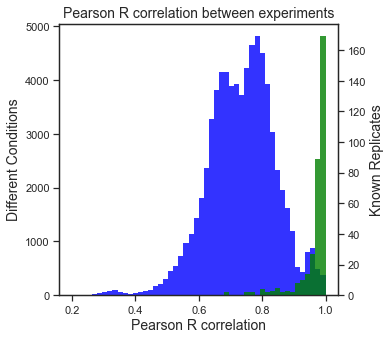

In [36]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [37]:
#pearson r cutoff for replicates
rcutoff = 0.95

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

In [38]:
len(dissimilar)

64

## Drop Samples with no replicates

In [39]:
cond_counts = DF_metadata_passed.condition_name.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['WT_pCAR1', 'WT_pCAR1_Del_pmr', 'WT_pCAR1_st', 'Zn2.5mM', 'Zn0mM',
       'Del_hfq_St', 'Zn1.5mM', 'Zn0.2mM', 'Del_crc_hfq', 'Del_hfq',
       'Pyrolysis_oil', 'Succinate', 'Glycerol', 'Fructose', 'K2_St', 'K1_St',
       'K2_Tr', 'K1_Tr', 'ZnO nano', 'K2_Ex', 'K1_Ex', 'Control_lignin'],
      dtype='object')

In [40]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_name.isin(drop_conds)

In [41]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

# Remove failed samples

In [42]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [43]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [44]:
DF_metadata_final.shape

(321, 46)

In [45]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

# Save final datasets

In [46]:
DF_log_tpm_final.to_csv('../data/interim/log_tpm_qc.csv')
DF_metadata_final.to_csv('../data/interim/metadata_qc.csv')

In [47]:
DF_metadata.to_csv('../data/interim/metadata_preQC.csv')